<a href="https://colab.research.google.com/github/dinesh6351/Credit_Card_Frade_detection/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preprocessing: Clean the dataset by handling missing values, outliers, and data inconsistencies. Perform feature scaling (standardization or normalization) to ensure that all features have similar scales.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data=pd.read_csv("/content/drive/MyDrive/FunctionUpAssignment/ML/ML_CSV/creditcard.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [6]:
data['Target'].value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [7]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
Target    0
dtype: int64

In [9]:
X=data.drop('Target',axis=1)

In [10]:
Y=data['Target']

In [11]:
columns=X.columns

In [12]:
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29'],
      dtype='object')

V1


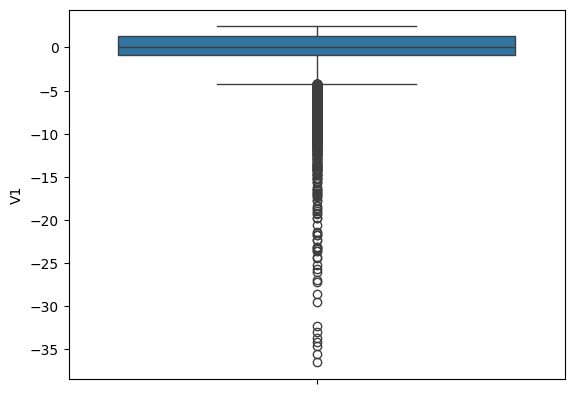

V2


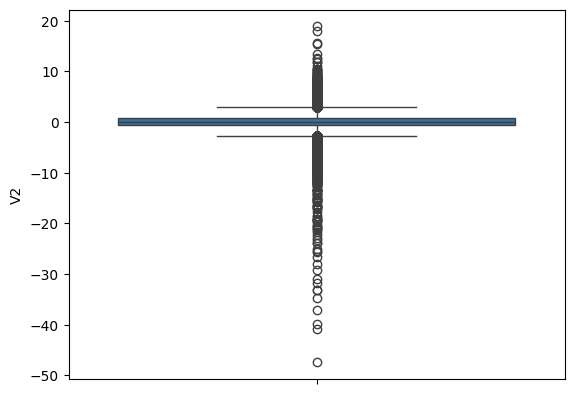

V3


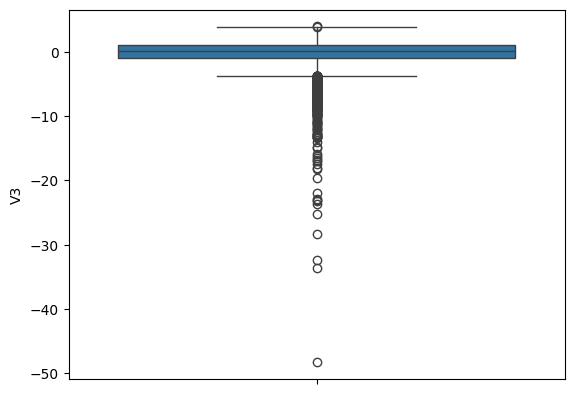

V4


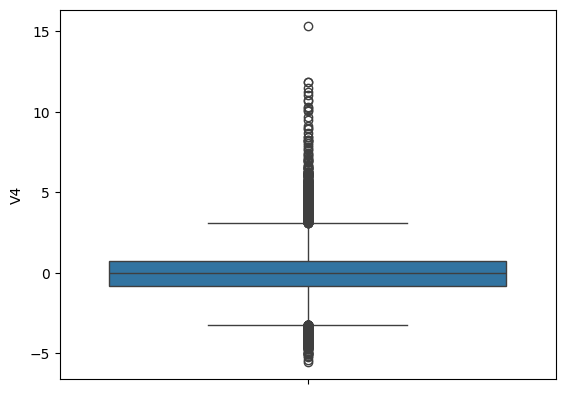

V5


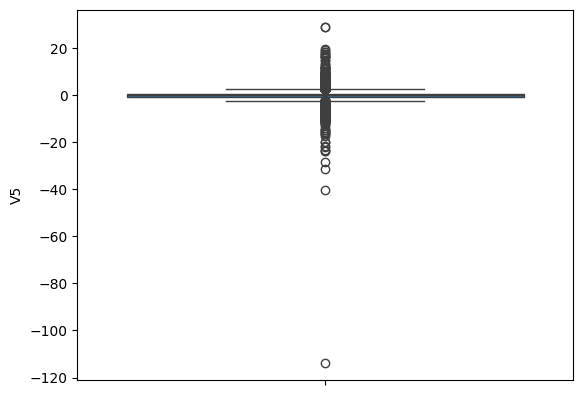

V6


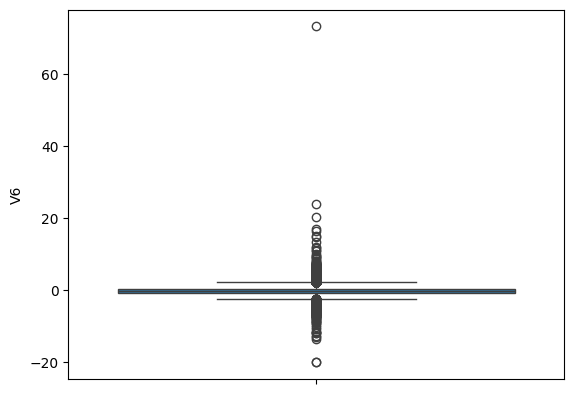

V7


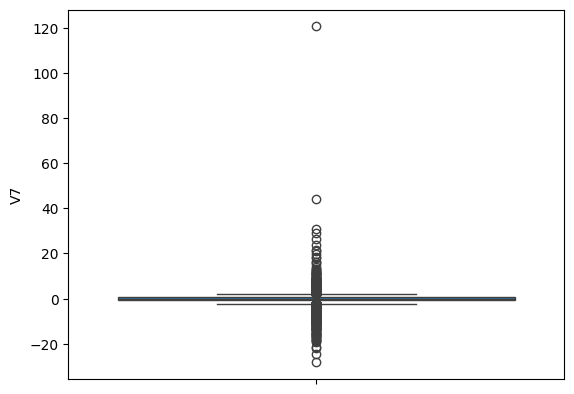

V8


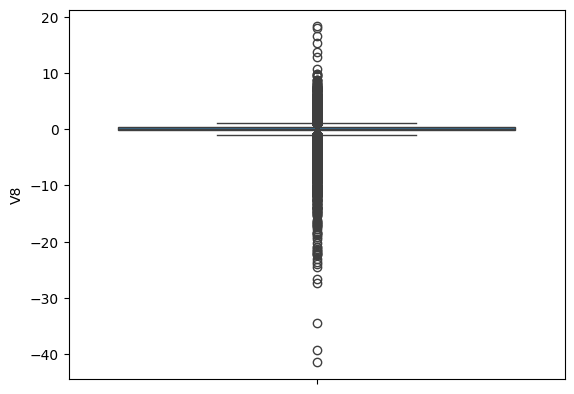

V9


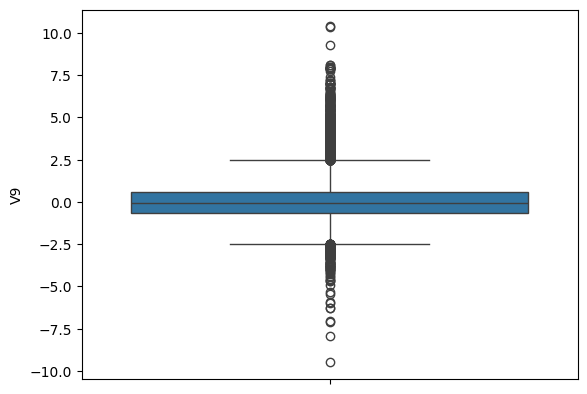

V10


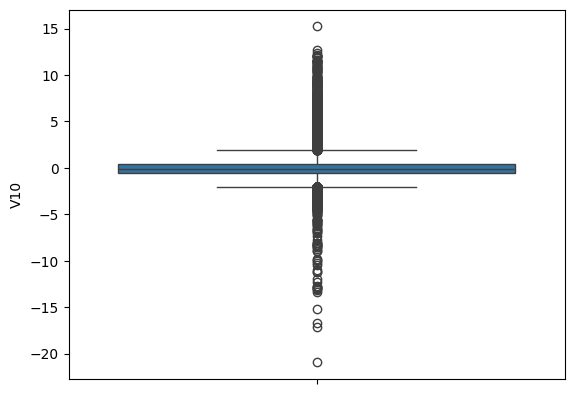

V11


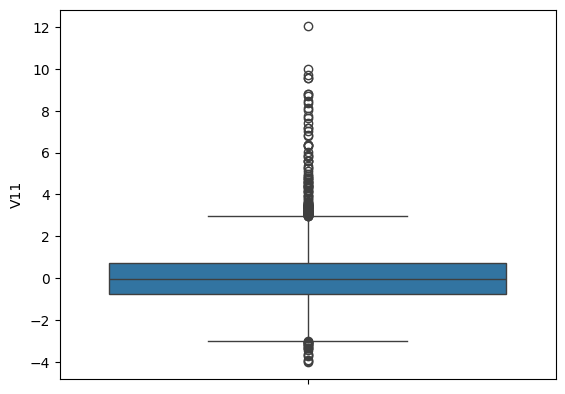

V12


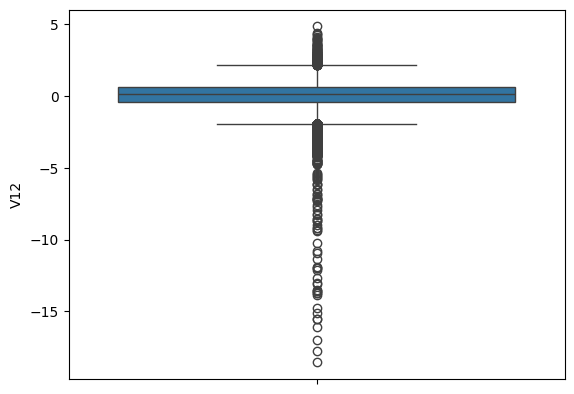

V13


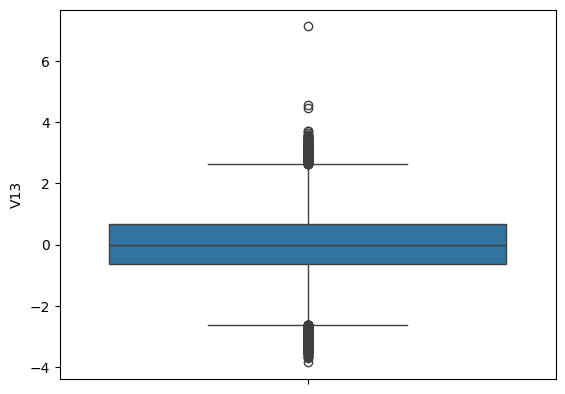

V14


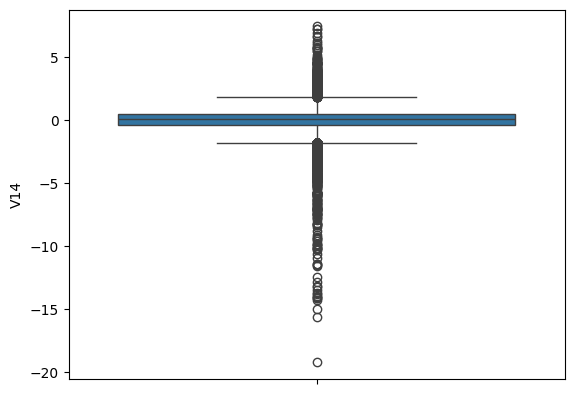

V15


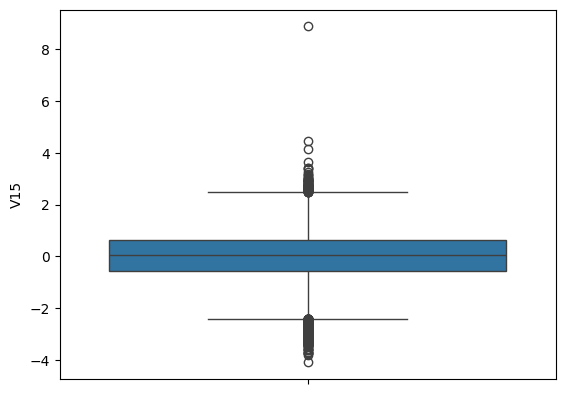

V16


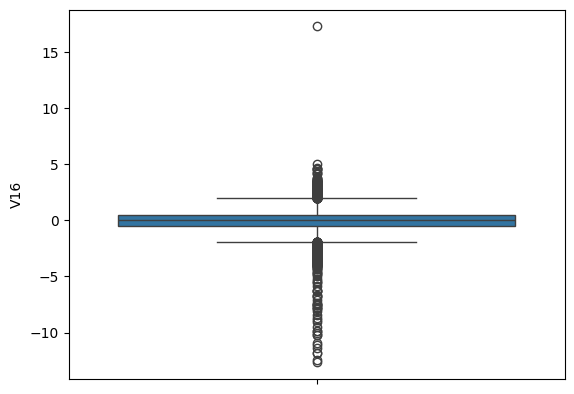

V17


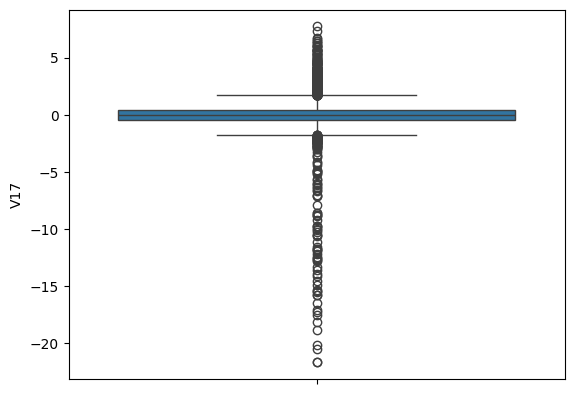

V18


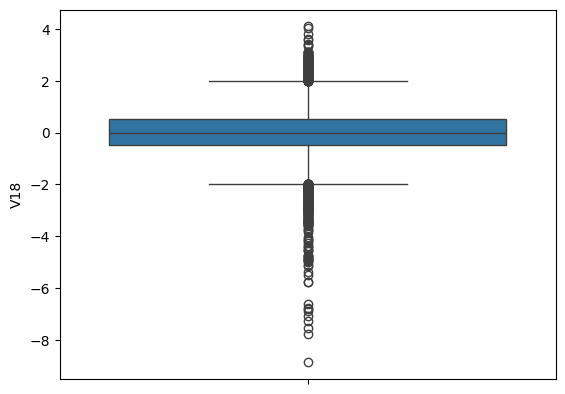

V19


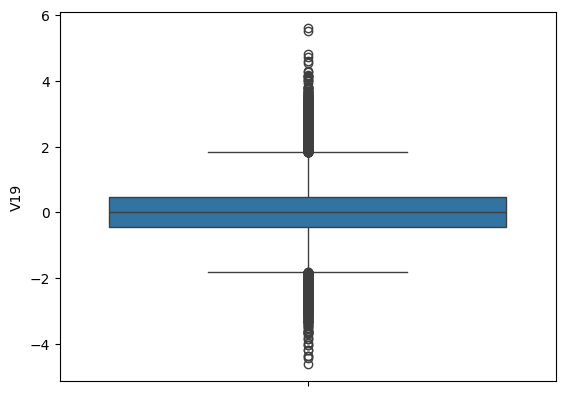

V20


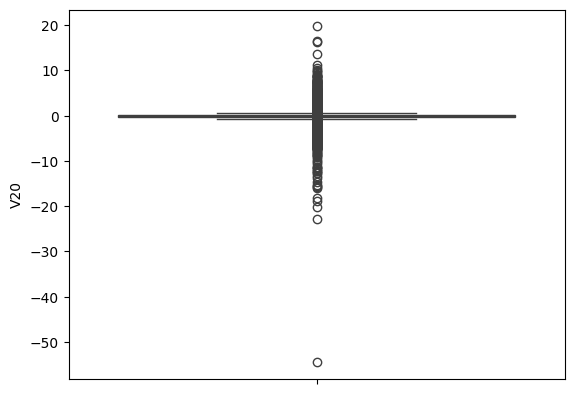

V21


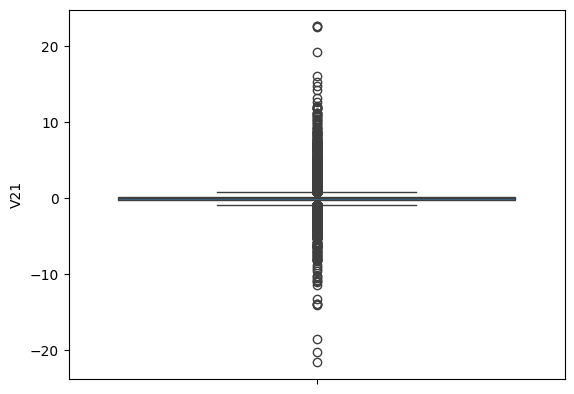

V22


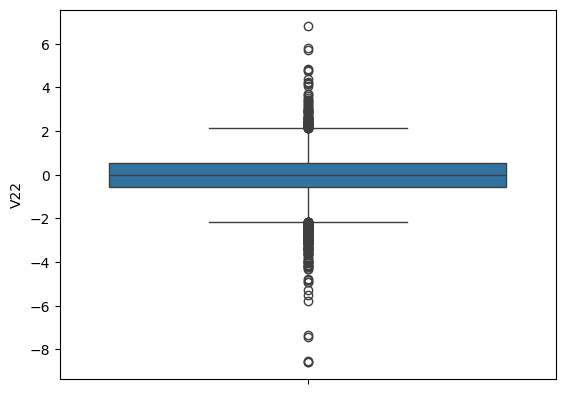

V23


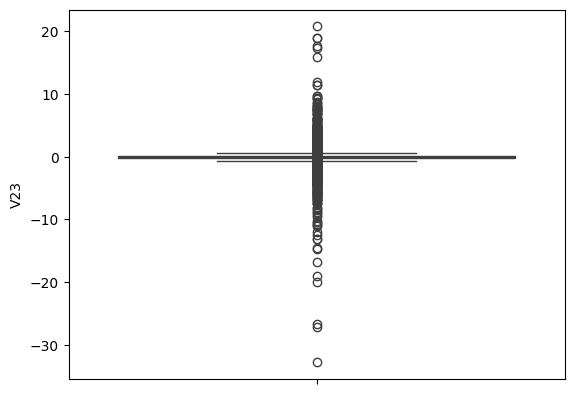

V24


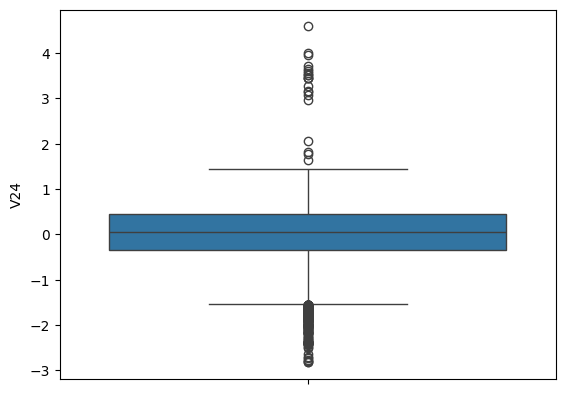

V25


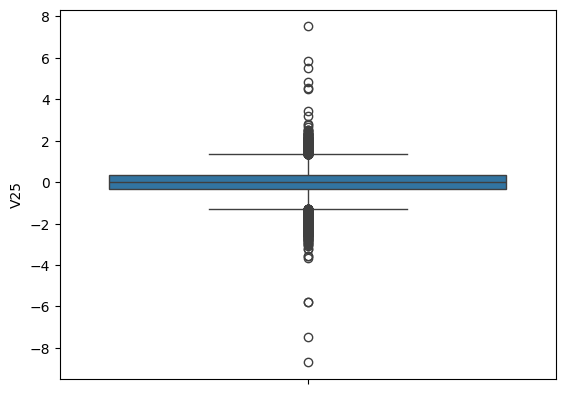

V26


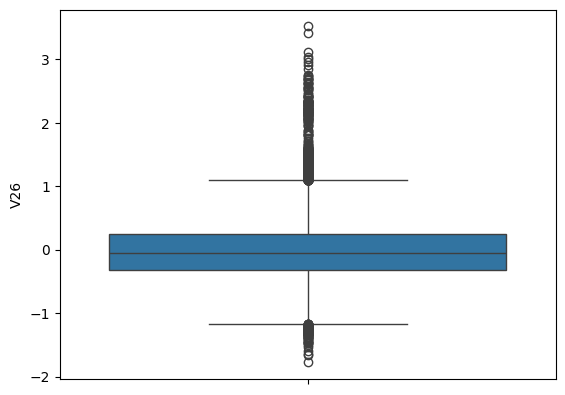

V27


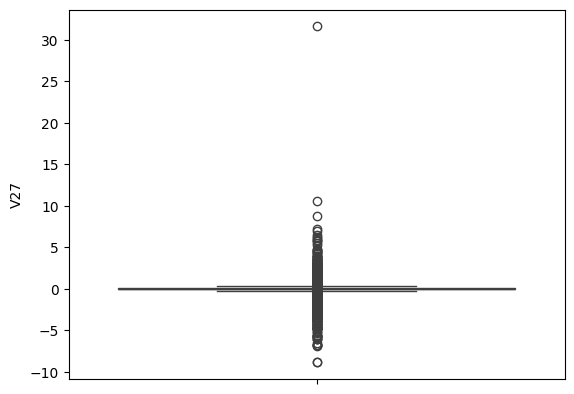

V28


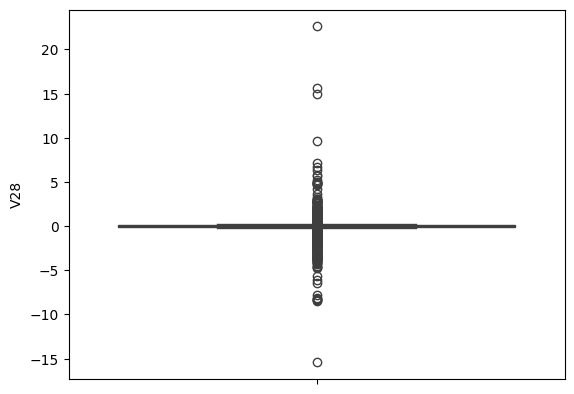

V29


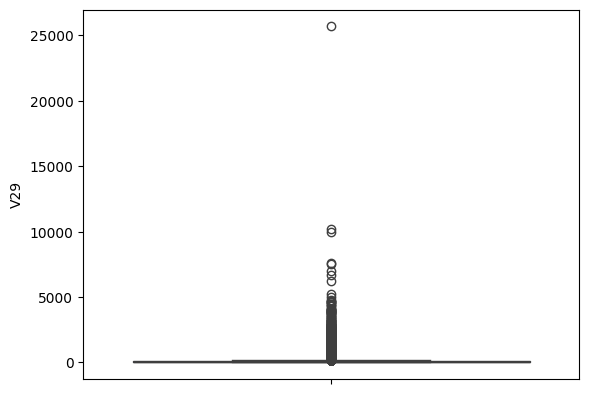

In [13]:
for features in columns:
  print(features)
  sns.boxplot(data[features])
  plt.show()

In [14]:
for features in columns:
  q1=data[features].quantile(0.25)
  q3=data[features].quantile(0.75)
  iqr= q3-q1
  upper_limit= q3+1.5*iqr
  lower_limit= q1 - 1.5* iqr
  data[features]=np.where(data[features]>upper_limit,upper_limit,
                        np.where(data[features]<lower_limit,lower_limit,data[features]))

V1


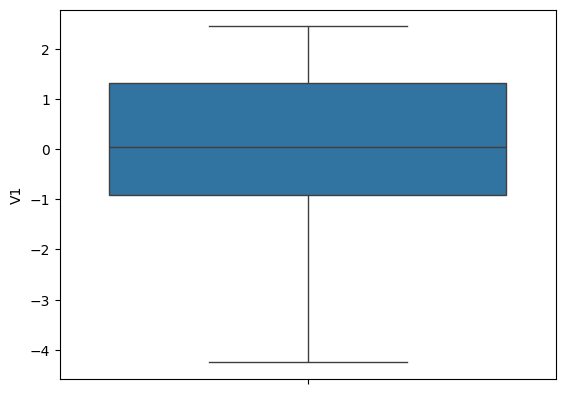

V2


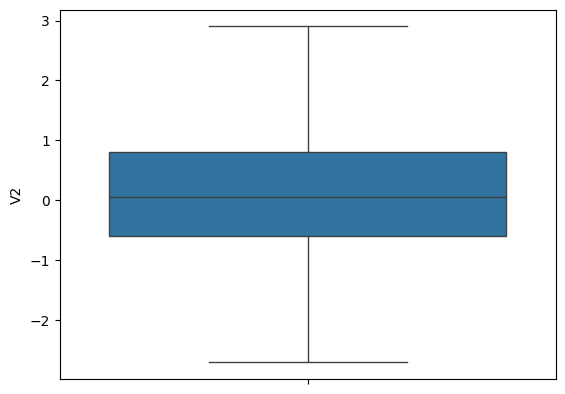

V3


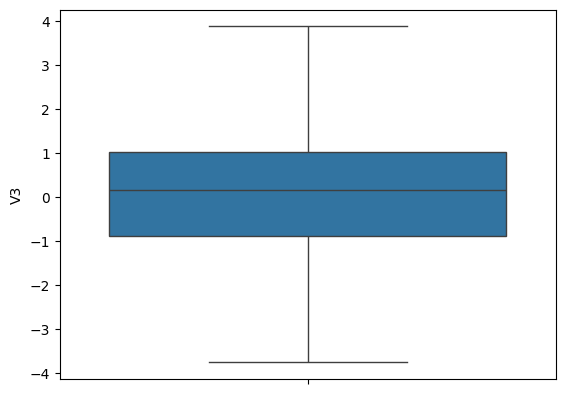

V4


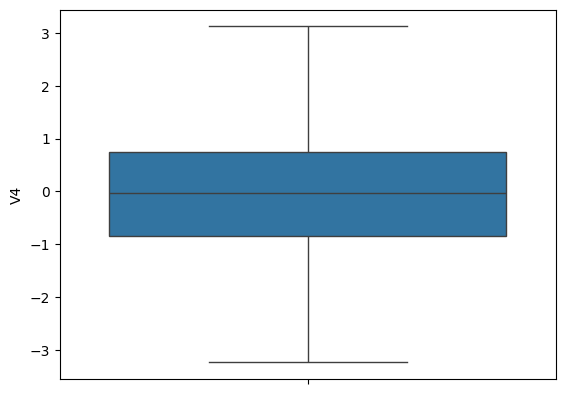

V5


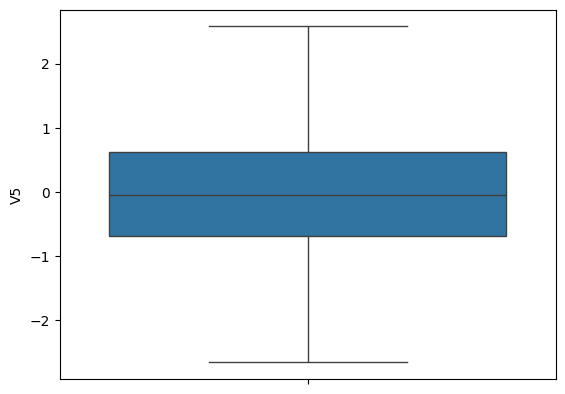

V6


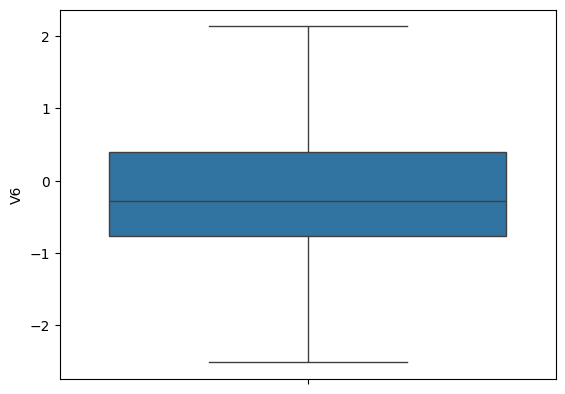

V7


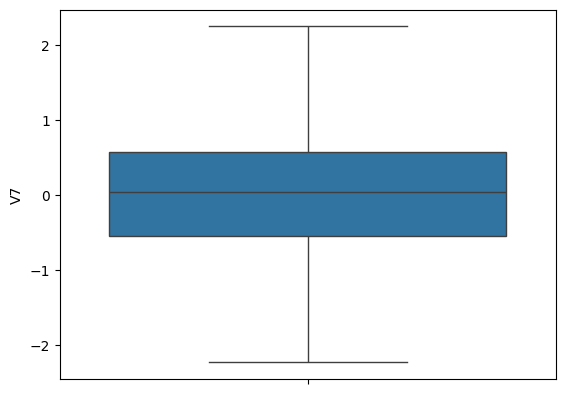

V8


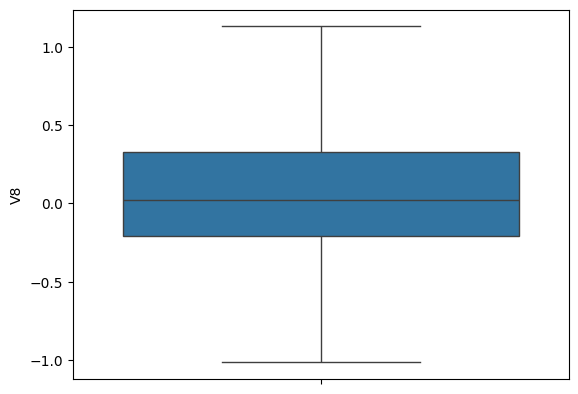

V9


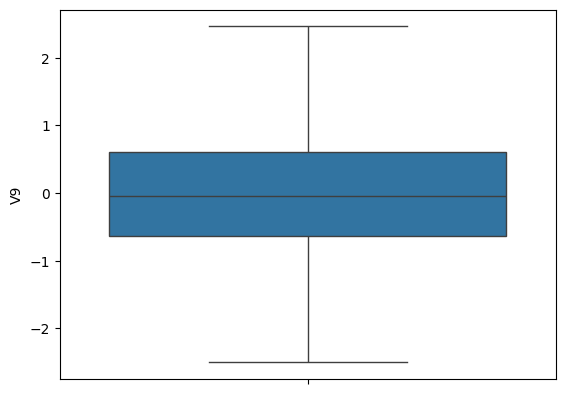

V10


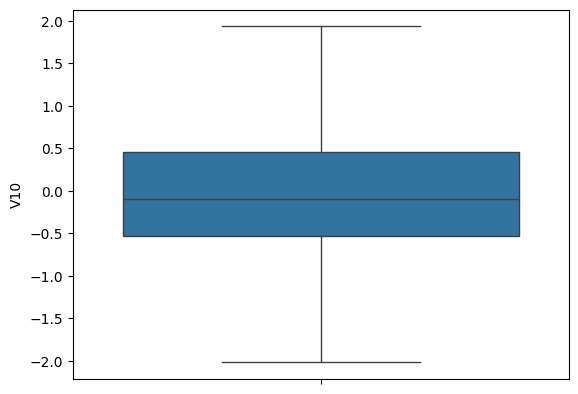

V11


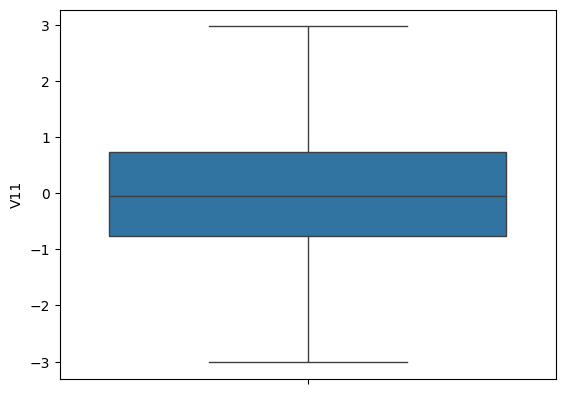

V12


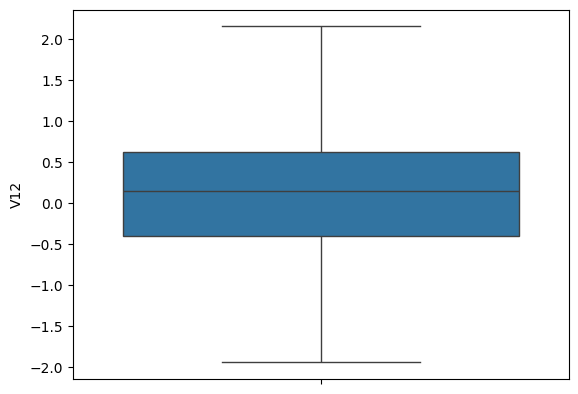

V13


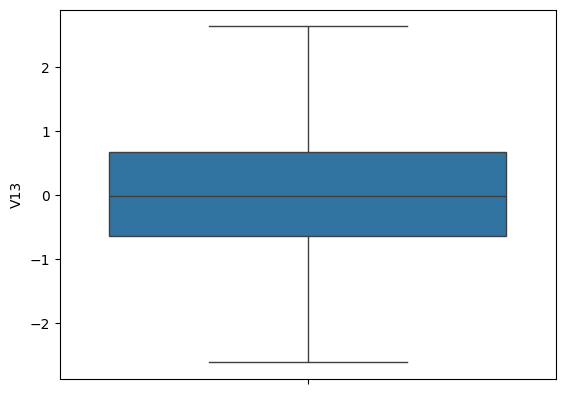

V14


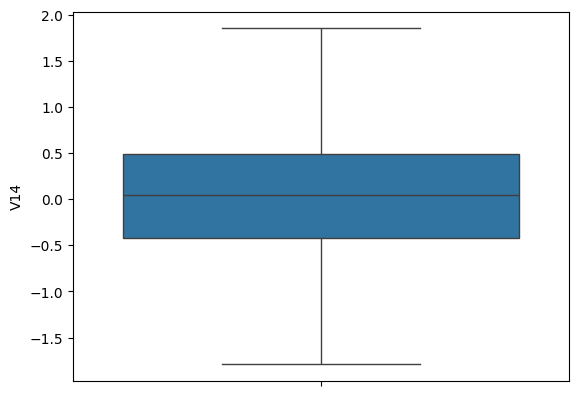

V15


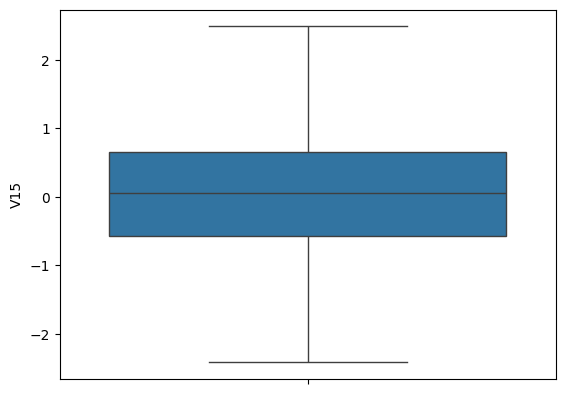

V16


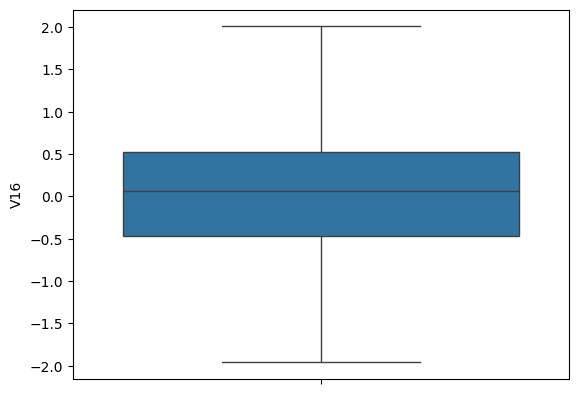

V17


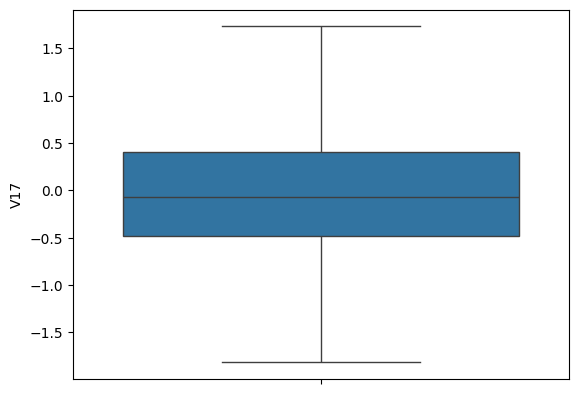

V18


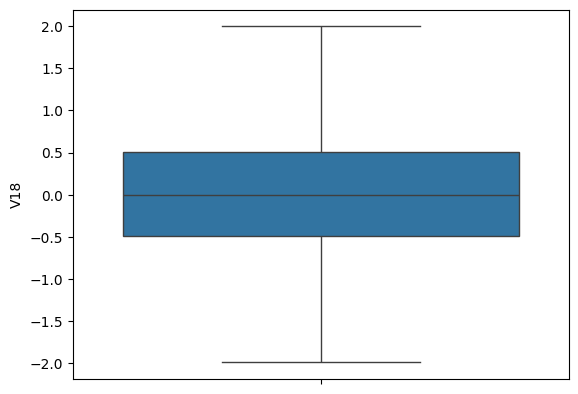

V19


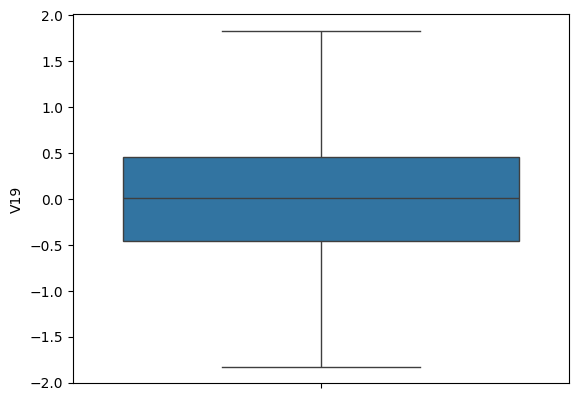

V20


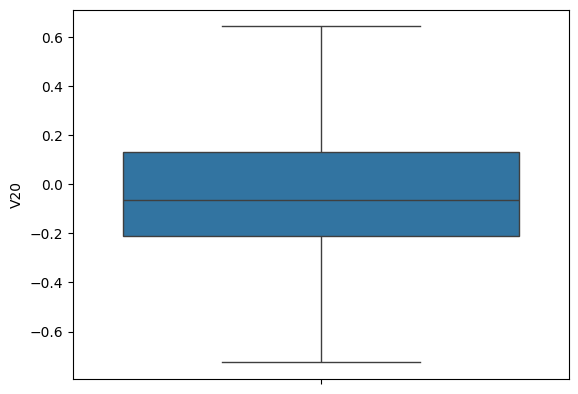

V21


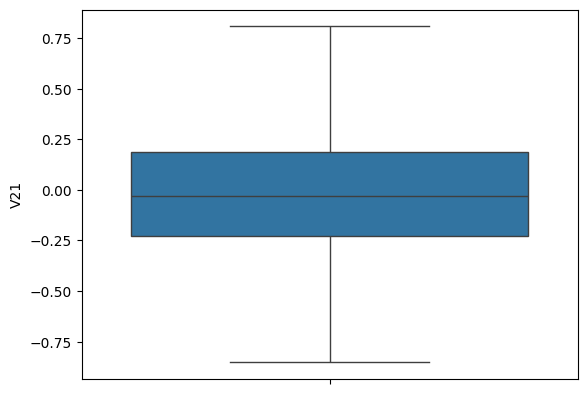

V22


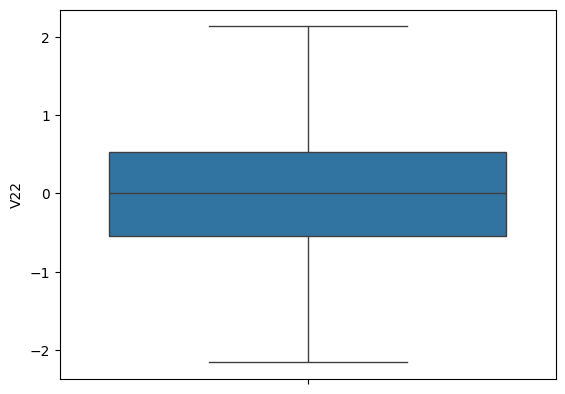

V23


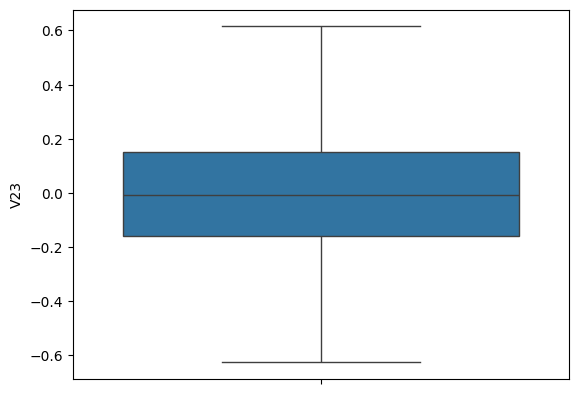

V24


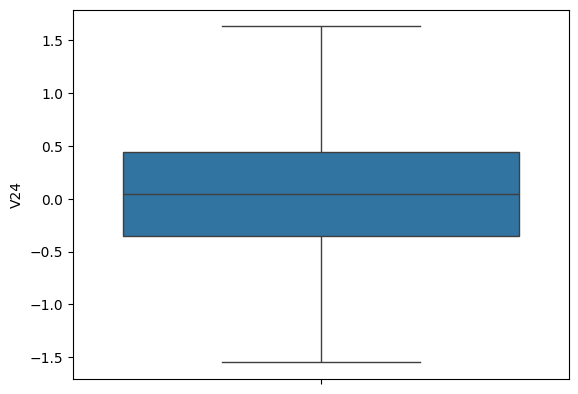

V25


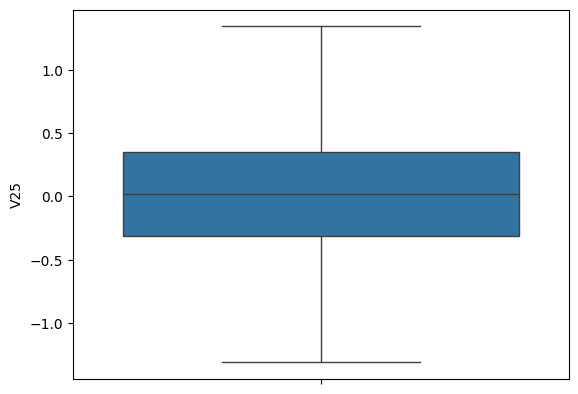

V26


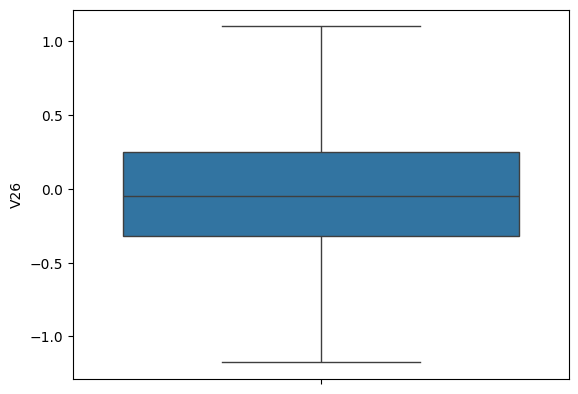

V27


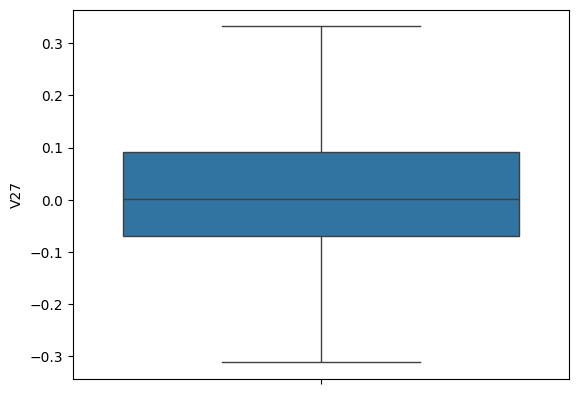

V28


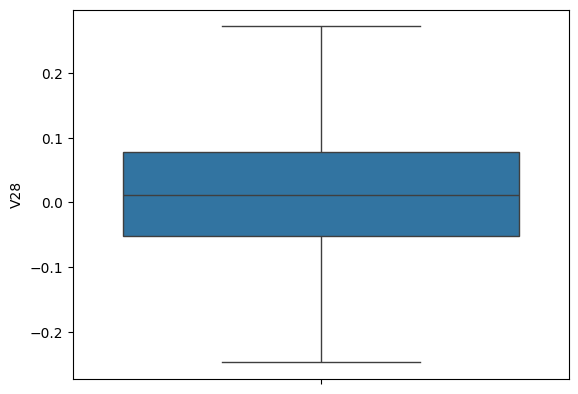

V29


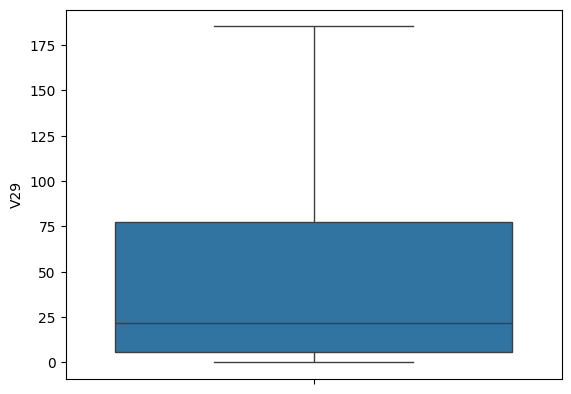

In [15]:
for features in columns:
  print(features)
  sns.boxplot(data[features])
  plt.show()

#Data Splitting: Divide your dataset into training, validation, and test sets. A common split could be around 70-80% for training, 10-15% for validation, and the remaining for testing.



In [17]:
legit=data[data['Target']==0]
farud=data[data['Target']==1]

In [22]:
legit_sample=legit.sample(n=100)
new_df=pd.concat([legit_sample,farud],axis=0)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
15950,1.418331,-0.522901,0.322606,-0.586694,-0.735828,-0.209595,-0.522869,-0.146735,-0.549527,0.479709,...,-0.726619,-1.406387,0.069224,-0.401666,0.238627,0.871402,-0.032134,0.006363,9.14,0
13432,-0.713662,1.454390,-0.408097,0.923503,0.381327,-0.468731,1.221757,0.190940,-1.055381,0.008752,...,0.219750,0.799310,-0.140385,0.037714,0.023223,-0.404672,0.213008,0.145924,69.89,0
41770,1.979871,-0.286580,-1.561556,0.187850,0.102301,-0.785776,0.121906,-0.172462,0.545766,0.199890,...,0.278029,0.779763,-0.095296,-0.485847,0.245246,-0.099202,-0.040058,-0.068655,44.99,0
3472,1.919510,-0.281413,-0.165188,1.255206,-0.746065,-0.338590,-0.700711,0.176893,0.911221,0.449381,...,0.258198,0.793739,0.164076,0.012735,-0.189698,-0.580306,0.042831,-0.043883,0.00,0
27771,1.589195,-1.294626,0.449353,0.638800,-0.686938,2.137219,-1.611722,0.804373,2.462193,-0.824977,...,0.258272,1.305087,0.137705,-0.273704,-0.304225,-0.419105,0.175806,-0.008588,93.09,0


In [23]:
new_df['Target'].value_counts()

0    100
1     98
Name: Target, dtype: int64

In [24]:
X=new_df.drop(['Target'],axis=1)
y=new_df[['Target']]

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scalar= MinMaxScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)
X_train= scalar.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=scalar.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)


In [28]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,0.231887,1.000000,0.000000,1.000000,0.000000,0.520614,0.000000,0.342850,0.000000,0.000000,...,0.664438,1.000000,0.480103,0.812134,0.524030,0.341817,0.636378,1.000000,0.896898,0.606116
1,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.729393,1.000000,0.186896,0.508061,0.811394,1.000000,0.000000,0.005396
2,0.818429,0.653841,0.501876,0.938681,0.586228,0.471601,0.507127,0.555640,0.309590,0.461270,...,0.403395,0.508255,0.489576,0.460832,0.572318,0.644336,0.545383,0.526060,0.597569,0.000000
3,0.620453,0.698018,0.452205,0.342185,0.734341,0.479972,0.720287,0.427300,0.572151,0.556245,...,0.773725,0.250805,0.300786,0.516786,0.607395,0.367226,0.559409,0.887972,0.413440,0.005342
4,0.821813,0.454683,0.485961,0.642731,0.630154,0.787788,0.496840,0.589504,0.546077,0.516869,...,0.527206,0.438579,0.424436,0.224366,0.000000,0.803029,0.411289,0.510690,0.475955,0.438575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.826351,0.604948,0.572983,0.902285,0.555431,0.424144,0.618796,0.385048,0.275009,0.680910,...,0.419141,0.542612,0.533709,0.461310,0.741187,0.727104,0.546218,0.447482,0.502147,0.104626
164,0.000000,0.000000,0.773864,0.751713,1.000000,0.000000,0.000000,0.860412,0.595147,0.467717,...,1.000000,1.000000,0.430003,1.000000,0.445445,0.728695,0.243271,0.113573,1.000000,0.021152
165,0.896477,0.226000,0.203147,0.172394,0.508196,0.353660,0.641050,0.256635,0.899627,0.139909,...,0.902122,0.487811,0.388601,0.373275,0.630010,0.568406,0.053807,0.442495,0.481937,1.000000
166,0.378826,0.304988,0.788234,0.268847,0.280443,0.624722,0.408545,0.498325,0.553164,0.624133,...,0.143239,0.574811,0.708199,0.000000,0.635325,0.560159,0.405455,0.000000,0.000000,0.791518


#Choose a Model: Start with simple models like logistic regression or decision trees. Gradually move on to more complex models like random forests, gradient boosting, or even deep learning models like neural networks.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Instantiate models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier(random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on the validation set
logistic_preds = logistic_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)

# Evaluate the models
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, logistic_preds))
print("Precision:", precision_score(y_test, logistic_preds))
print("Recall:", recall_score(y_test, logistic_preds))
print("F1 Score:", f1_score(y_test, logistic_preds))

print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, decision_tree_preds))
print("Precision:", precision_score(y_test, decision_tree_preds))
print("Recall:", recall_score(y_test, decision_tree_preds))
print("F1 Score:", f1_score(y_test, decision_tree_preds))


Logistic Regression Metrics:
Accuracy: 0.8666666666666667
Precision: 1.0
Recall: 0.7333333333333333
F1 Score: 0.846153846153846

Decision Tree Metrics:
Accuracy: 0.8333333333333334
Precision: 0.8571428571428571
Recall: 0.8
F1 Score: 0.8275862068965518


#Model Training: Train your selected model(s) using the training dataset. Pay attention to parameter tuning (hyperparameter tuning) to achieve the best performance. You might want to use libraries like Scikit-Learn.
#Note : You are required to use at least 2 ML algorithms and compare results of both.


#1. Logistic Regression - Hyperparameter Tuning:


In [31]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Logistic Regression
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Instantiate Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# GridSearchCV for hyperparameter tuning
logistic_grid_search = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='f1')
logistic_grid_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

#2. Decision Tree Classifier - Hyperparameter Tuning:


In [32]:
# Define the hyperparameter grid for Decision Tree Classifier
tree_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
tree_grid_search = GridSearchCV(tree_model, tree_params, cv=5, scoring='f1')
tree_grid_search.fit(X_train, y_train)

# Best hyperparameters
best_tree_params = tree_grid_search.best_params_

# Train the Decision Tree model with the best parameters
best_tree_model = DecisionTreeClassifier(**best_tree_params, random_state=42)
best_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

#3. Model Comparison:


In [35]:
# Predictions on the validation set
best_logistic_preds = logistic_grid_search.predict(X_test)
best_tree_preds = best_tree_model.predict(X_test)

# Evaluate the models
print("Best Logistic Regression Metrics:")
print("F1 Score:", f1_score(y_test, best_logistic_preds))

print("\nBest Decision Tree Metrics:")
print("F1 Score:", f1_score(y_test, best_tree_preds))


Best Logistic Regression Metrics:
F1 Score: 0.846153846153846

Best Decision Tree Metrics:
F1 Score: 0.7857142857142856


In [42]:
from sklearn.metrics import accuracy_score,classification_report
print("Best Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, best_logistic_preds))

print("\nBest Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, best_tree_preds))


Best Logistic Regression Metrics:
Accuracy: 0.8666666666666667

Best Decision Tree Metrics:
Accuracy: 0.8


#Model Evaluation: Use the validation set to evaluate the performance of your model using appropriate metrics like accuracy, precision, recall, F1-score, and the ROC curve. Adjust your model and hyperparameters based on the evaluation results.

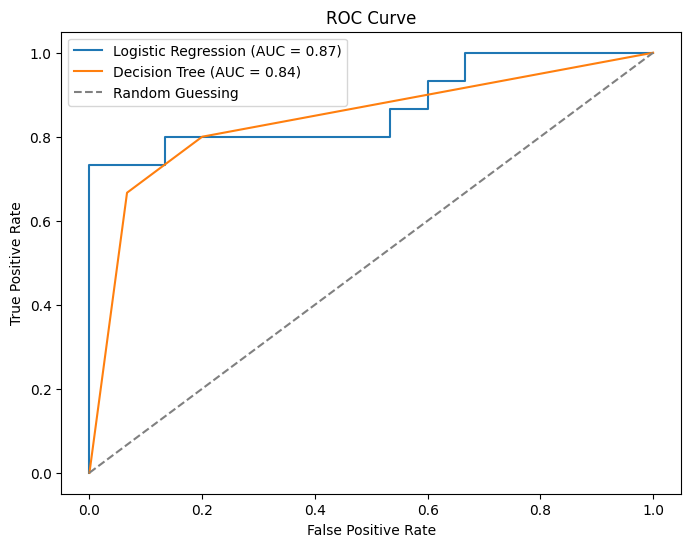

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

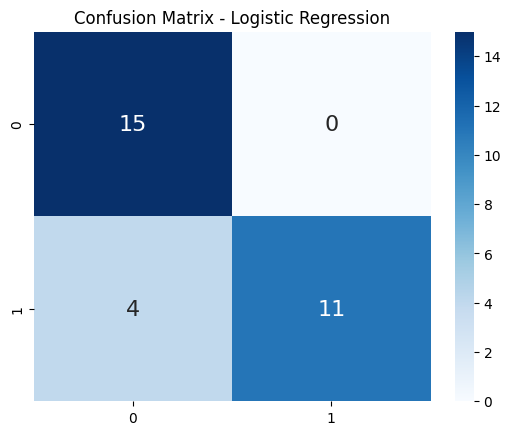

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Logistic Regression model
logistic_accuracy = accuracy_score(y_test, best_logistic_preds)
logistic_precision = precision_score(y_test, best_logistic_preds)
logistic_recall = recall_score(y_test, best_logistic_preds)
logistic_f1 = f1_score(y_test, best_logistic_preds)

# Evaluate Decision Tree model
tree_accuracy = accuracy_score(y_test, best_tree_preds)
tree_precision = precision_score(y_test, best_tree_preds)
tree_recall = recall_score(y_test, best_tree_preds)
tree_f1 = f1_score(y_test, best_tree_preds)

# ROC Curve for Logistic Regression
logistic_probabilities = logistic_grid_search.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probabilities)
roc_auc_logistic = roc_auc_score(y_test, logistic_probabilities)

# ROC Curve for Decision Tree
tree_probabilities = best_tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probabilities)
roc_auc_tree = roc_auc_score(y_test, tree_probabilities)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Confusion Matrix for Logistic Regression
logistic_cm = confusion_matrix(y_test, best_logistic_preds)
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression')

plt.xlabel


In [41]:
from sklearn.metrics import accuracy_score,classification_report
print("Best Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, best_logistic_preds))

print("\nBest Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, best_tree_preds))



Best Logistic Regression Metrics:
Accuracy: 0.8666666666666667

Best Decision Tree Metrics:
Accuracy: 0.8


# Logistic Regression is give best accuracy